<a href="https://colab.research.google.com/github/HSGanesh/1CD22AI023/blob/main/LSTM/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

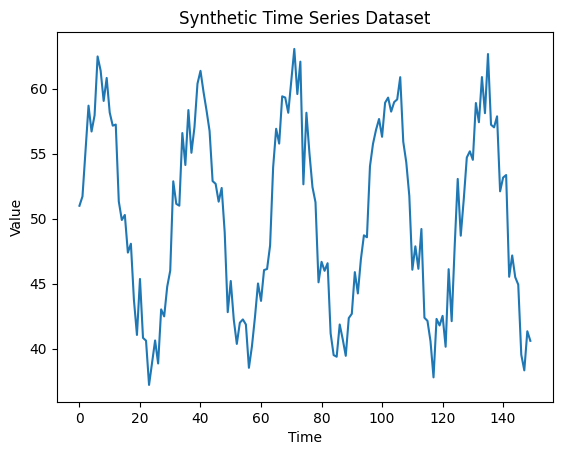

Train size: 112, Test size: 38
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1582
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0394
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0236
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoch 15/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,555 (9.98 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,704 (6.66 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Train RMSE: 2.24
Test RMSE: 2.79


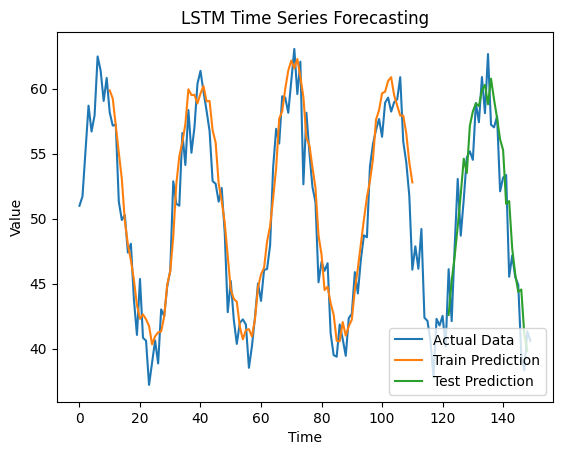

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# -----------------------------
# Built-in Synthetic Time Series Dataset
# -----------------------------
np.random.seed(42)
time = np.arange(0, 150, 1)
dataset = 50 + 10*np.sin(time * 0.2) + np.random.normal(0, 2, len(time))
dataset = dataset.astype("float32")

# -----------------------------
# Plot Original Dataset
# -----------------------------
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series Dataset")
plt.show()

dataset = dataset.reshape(-1, 1)

# -----------------------------
# Scaling
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.75)
train = dataset[:train_size]
test = dataset[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

# -----------------------------
# Dataset Preparation
# -----------------------------
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_stamp = 10
trainX, trainY = create_dataset(train, time_stamp)
testX, testY = create_dataset(test, time_stamp)

trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# -----------------------------
# LSTM Model
# -----------------------------
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stamp)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

model.summary()
plot_model(model, to_file='lstm_model.png', show_shapes=True)

# -----------------------------
# Predictions
# -----------------------------
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# -----------------------------
# RMSE
# -----------------------------
trainScore = math.sqrt(mean_squared_error(trainY[:, 0], trainPredict[:, 0]))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))

print(f"Train RMSE: {trainScore:.2f}")
print(f"Test RMSE: {testScore:.2f}")

# -----------------------------
# Plot Predictions
# -----------------------------
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[time_stamp:len(trainPredict)+time_stamp] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(time_stamp*2)+1:len(dataset)-1] = testPredict

plt.plot(scaler.inverse_transform(dataset), label="Actual Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("LSTM Time Series Forecasting")
plt.show()
